In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1. Import the required libraries

In [ ]:
# Data Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

# Pre-processing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Model
import keras
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam         # Adaptive Moment Estimation

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score

Step 2. Read the dataset.

In [ ]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/csv_dataset/heart_failure.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Step 3. Assign values to features as X and target as y

In [ ]:
X = data.drop(["DEATH_EVENT"], axis=1)
y = data["DEATH_EVENT"]

Step 4. Split the training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Step 5. Scale the features

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Building the Model**

Step 6. Initialize the Neural Network

In [ ]:
ann = tf.keras.models.Sequential()

Step 7. Add layers.

In [ ]:
# Input layer & first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
# Second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
# Output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Step 8. Compile the ANN

In [ ]:
ann.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Step 9. Train the ANN

In [ ]:
model = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 3s 4ms/step - loss: 0.9175 - accuracy: 0.3515
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8898 - accuracy: 0.3640
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.3682
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8393 - accuracy: 0.3849
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8172 - accuracy: 0.3891
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7983 - accuracy: 0.4100
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7790 - accuracy: 0.4226
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7622 - accuracy: 0.4561
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.4770
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7317 - accuracy: 0.4937
Epoch 11/100
8/8 [===========

In [ ]:
model_df = pd.DataFrame(model.history)
model_df

,loss,accuracy
0,0.917493,0.351464
1,0.889820,0.364017
2,0.863436,0.368201
3,0.839349,0.384937
4,0.817163,0.389121
...,...,...
95,0.324079,0.861925
96,0.323516,0.861925
97,0.322845,0.861925
98,0.322097,0.861925


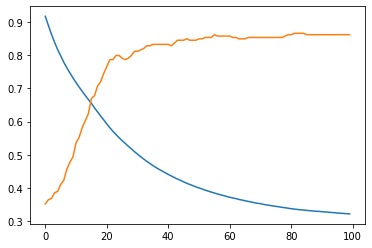

In [ ]:
model_df.loc[:100, "loss"].plot()
model_df.loc[:100, "accuracy"].plot()